In [552]:
import pandas as pd
import numpy as np
import pylab
import math
import os

In [553]:
import matplotlib.pyplot as plt
import seaborn as sns

In [554]:
from scipy import stats

In [555]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [556]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
%matplotlib inline

In [557]:
df1 = pd.read_csv('data/listings.csv')

In [558]:
df1.shape

(3818, 20)

In [559]:
df1.dropna(inplace = True)

In [560]:
df1.head()

,id,host_is_superhost,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,weekly_price,monthly_price,cleaning_fee,guests_included,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
1,953595,t,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,"$1,000.00","$3,000.00",$40.00,1,96.0,10.0,10.0,10.0,10.0,10.0,10.0
9,2493658,t,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,"$1,000.00","$3,000.00",$40.00,1,97.0,10.0,10.0,10.0,10.0,10.0,9.0
11,4454295,f,98119,House,Entire home/apt,2,1.0,1.0,1.0,$800.00,"$2,000.00",$150.00,1,97.0,10.0,10.0,9.0,10.0,10.0,9.0
12,3883392,t,98119,Apartment,Entire home/apt,4,1.0,2.0,3.0,"$1,575.00","$5,800.00",$95.00,1,98.0,10.0,10.0,10.0,10.0,10.0,10.0
21,4125779,f,98119,House,Private room,3,1.5,1.0,2.0,$568.00,"$2,029.00",$15.00,1,84.0,9.0,9.0,9.0,9.0,10.0,8.0


In [561]:
display(df1.isnull().any())
df1.shape

id                             False
host_is_superhost              False
zipcode                        False
property_type                  False
room_type                      False
accommodates                   False
bathrooms                      False
bedrooms                       False
beds                           False
weekly_price                   False
monthly_price                  False
cleaning_fee                   False
guests_included                False
review_scores_rating           False
review_scores_accuracy         False
review_scores_cleanliness      False
review_scores_checkin          False
review_scores_communication    False
review_scores_location         False
review_scores_value            False
dtype: bool

(1032, 20)

In [562]:
df_abnb = df1.filter(['zipcode', 'property_type', 'room_type', 'bathrooms', 'bedrooms', 'monthly_price', 'review_scores_rating'], axis=1)

In [563]:
df_abnb.describe()

,bathrooms,bedrooms,review_scores_rating
count,1032.000000,1032.000000,1032.00000
mean,1.228198,1.298450,94.05814
std,0.549675,0.844953,7.32656
min,0.500000,0.000000,20.00000
25%,1.000000,1.000000,92.00000
50%,1.000000,1.000000,96.00000
75%,1.000000,2.000000,99.00000
max,4.500000,6.000000,100.00000


In [564]:
def column_conversion(df, col):
    df[col] = df[col].str.replace("$","").str.replace(",","").str.replace(".","").astype('int')
    return df

In [565]:
column_to_convert = ['monthly_price']

for col in column_to_convert:
    df_abnb = column_conversion(df_abnb, col)

In [566]:
df_abnb['monthly_price'] = df_abnb['monthly_price'].div(100).round(2)

In [567]:
df_abnb.head()

,zipcode,property_type,room_type,bathrooms,bedrooms,monthly_price,review_scores_rating
1,98119,Apartment,Entire home/apt,1.0,1.0,3000.0,96.0
9,98119,Apartment,Entire home/apt,1.0,1.0,3000.0,97.0
11,98119,House,Entire home/apt,1.0,1.0,2000.0,97.0
12,98119,Apartment,Entire home/apt,1.0,2.0,5800.0,98.0
21,98119,House,Private room,1.5,1.0,2029.0,84.0


In [568]:
print(df_abnb['room_type'].unique())

['Entire home/apt' 'Private room' 'Shared room']


In [569]:
print(df_abnb['property_type'].unique())

['Apartment' 'House' 'Condominium' 'Bungalow' 'Townhouse' 'Other' 'Cabin'
 'Loft' 'Bed & Breakfast' 'Chalet' 'Camper/RV']


In [570]:
sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

[Text(0, 0, 'Apartment'),
 Text(1, 0, 'House'),
 Text(2, 0, 'Condominium'),
 Text(3, 0, 'Bungalow'),
 Text(4, 0, 'Townhouse'),
 Text(5, 0, 'Other'),
 Text(6, 0, 'Cabin'),
 Text(7, 0, 'Loft'),
 Text(8, 0, 'Bed & Breakfast'),
 Text(9, 0, 'Chalet'),
 Text(10, 0, 'Camper/RV')]

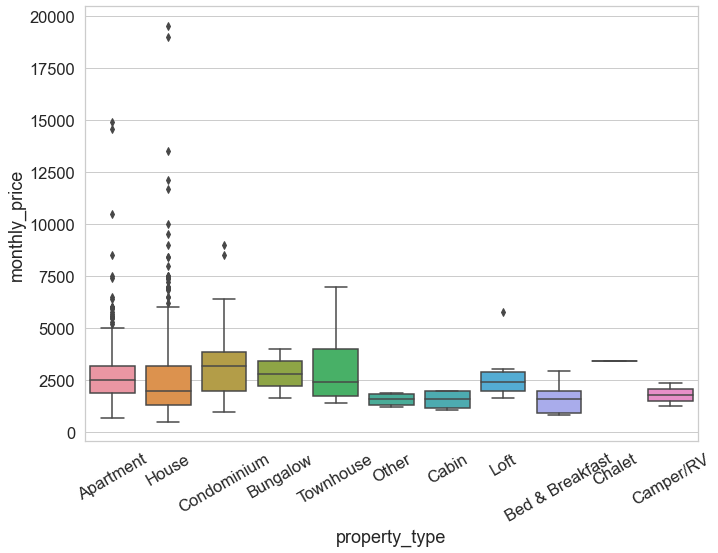

In [571]:
ax = sns.boxplot(x="property_type", y="monthly_price", data=df_abnb)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

In [572]:
df_abnb['property_type'] = df_abnb['property_type'].astype('category')
df_abnb.dtypes

zipcode                   object
property_type           category
room_type                 object
bathrooms                float64
bedrooms                 float64
monthly_price            float64
review_scores_rating     float64
dtype: object

In [573]:
df_abnb['property_type_cat'] = df_abnb['property_type'].cat.codes
df_abnb.head()

,zipcode,property_type,room_type,bathrooms,bedrooms,monthly_price,review_scores_rating,property_type_cat
1,98119,Apartment,Entire home/apt,1.0,1.0,3000.0,96.0,0
9,98119,Apartment,Entire home/apt,1.0,1.0,3000.0,97.0,0
11,98119,House,Entire home/apt,1.0,1.0,2000.0,97.0,7
12,98119,Apartment,Entire home/apt,1.0,2.0,5800.0,98.0,0
21,98119,House,Private room,1.5,1.0,2029.0,84.0,7


In [574]:
df_abnb['room_type'] = df_abnb['room_type'].astype('category')
df_abnb.dtypes

zipcode                   object
property_type           category
room_type               category
bathrooms                float64
bedrooms                 float64
monthly_price            float64
review_scores_rating     float64
property_type_cat           int8
dtype: object

In [575]:
df_abnb['room_type_cat'] = df_abnb['room_type'].cat.codes
df_abnb.head()

,zipcode,property_type,room_type,bathrooms,bedrooms,monthly_price,review_scores_rating,property_type_cat,room_type_cat
1,98119,Apartment,Entire home/apt,1.0,1.0,3000.0,96.0,0,0
9,98119,Apartment,Entire home/apt,1.0,1.0,3000.0,97.0,0,0
11,98119,House,Entire home/apt,1.0,1.0,2000.0,97.0,7,0
12,98119,Apartment,Entire home/apt,1.0,2.0,5800.0,98.0,0,0
21,98119,House,Private room,1.5,1.0,2029.0,84.0,7,1


In [576]:
df_abnb = df_abnb[['zipcode', 'bathrooms', 'bedrooms', 'monthly_price', 'review_scores_rating', 'property_type_cat', 'room_type_cat']]

In [577]:
df_abnb.head()

,zipcode,bathrooms,bedrooms,monthly_price,review_scores_rating,property_type_cat,room_type_cat
1,98119,1.0,1.0,3000.0,96.0,0,0
9,98119,1.0,1.0,3000.0,97.0,0,0
11,98119,1.0,1.0,2000.0,97.0,7,0
12,98119,1.0,2.0,5800.0,98.0,0,0
21,98119,1.5,1.0,2029.0,84.0,7,1


In [578]:
min_threshold, max_threshold = df_abnb.monthly_price.quantile([0.25, 0.75])
min_threshold, max_threshold

(1650.0, 3200.0)

In [579]:
df_1 = df_abnb[(df_abnb.monthly_price < max_threshold) & (df_abnb.monthly_price > min_threshold)]

In [580]:
df_1.shape

(492, 7)

In [581]:
df_1 = df_1[df_1['review_scores_rating'] > 92]

In [582]:
df_1.shape

(366, 7)

array([[<AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'bedrooms'}>],
       [<AxesSubplot:title={'center':'monthly_price'}>,
        <AxesSubplot:title={'center':'review_scores_rating'}>],
       [<AxesSubplot:title={'center':'property_type_cat'}>,
        <AxesSubplot:title={'center':'room_type_cat'}>]], dtype=object)

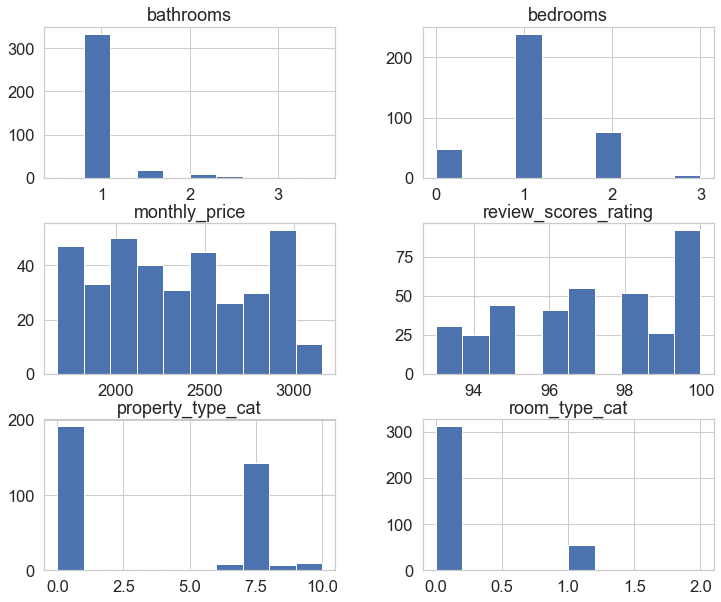

In [583]:
df_1.hist(figsize = (12,10))

In [584]:
df_abnb['zipcode'] = df_abnb['zipcode'].astype('int')
df_abnb.dtypes

zipcode                   int64
bathrooms               float64
bedrooms                float64
monthly_price           float64
review_scores_rating    float64
property_type_cat          int8
room_type_cat              int8
dtype: object

In [585]:
df_abnb.corr()

,zipcode,bathrooms,bedrooms,monthly_price,review_scores_rating,property_type_cat,room_type_cat
zipcode,1.000000,0.091660,0.079374,-0.041459,0.050569,0.126911,0.020218
bathrooms,0.091660,1.000000,0.618600,0.520524,0.035599,0.245875,-0.127112
bedrooms,0.079374,0.618600,1.000000,0.584791,0.026180,0.256996,-0.209847
monthly_price,-0.041459,0.520524,0.584791,1.000000,0.074633,-0.032328,-0.431006
review_scores_rating,0.050569,0.035599,0.026180,0.074633,1.000000,0.073849,-0.023408
property_type_cat,0.126911,0.245875,0.256996,-0.032328,0.073849,1.000000,0.354985
room_type_cat,0.020218,-0.127112,-0.209847,-0.431006,-0.023408,0.354985,1.000000


<AxesSubplot:>

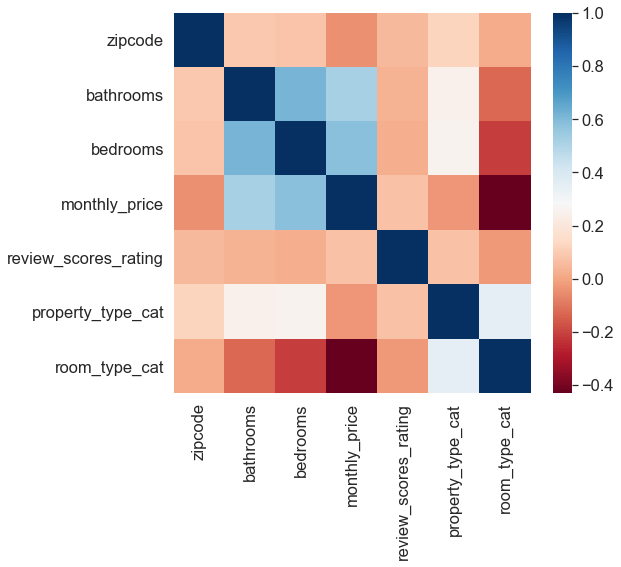

In [586]:
#Looking at the correlation between different columns to check for multicollinearity.

plt.figure(figsize = (8,7))
sns.heatmap(df_abnb.corr(), cmap = 'RdBu')

## KC Housing Data
First downloading the data.  We are looking at housng data from homes which come from the King County area in Seattle.  The scenario is for an investor looking to invest in homes in this area that will turn a profit.  The data comes from open source data from the king county website as well as information on airbnbs in this area from the Airbnb website.

In [657]:
df = pd.read_csv('data/kc_house_data.csv')

In [658]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


In [659]:
#taking a look into data types.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [660]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


## Cleaning the data.

In [661]:
# First dropping date.  I am not interested in the time of year this sells as it will be a rental unit. 
#Also dropping square foot basement.  It is another object that has no use for me.
df.drop('date', inplace = True, axis = 1)

In [662]:
df.drop('sqft_basement', inplace = True, axis = 1)

In [663]:
#checking to see it worked.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17755 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

In [664]:
#changing everything to a float so that I can use a z score multiplier on it later.

df.astype('float')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7.129301e+09,221900.0,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3.0,7.0,1180.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,6.414100e+09,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,5.631500e+09,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,1933.0,NaN,98028.0,47.7379,-122.233,2720.0,8062.0
3,2.487201e+09,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,1.954401e+09,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2.630000e+08,360000.0,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,3.0,8.0,1530.0,2009.0,0.0,98103.0,47.6993,-122.346,1530.0,1509.0
21593,6.600060e+09,400000.0,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,3.0,8.0,2310.0,2014.0,0.0,98146.0,47.5107,-122.362,1830.0,7200.0
21594,1.523300e+09,402101.0,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,3.0,7.0,1020.0,2009.0,0.0,98144.0,47.5944,-122.299,1020.0,2007.0
21595,2.913101e+08,400000.0,3.0,2.50,1600.0,2388.0,2.0,NaN,0.0,3.0,8.0,1600.0,2004.0,0.0,98027.0,47.5345,-122.069,1410.0,1287.0


In [665]:
df = df.dropna(axis = 0)

In [666]:
#check for nulls
display(df.isnull().any())
df.shape

id               False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

(15762, 19)

In [667]:
df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [668]:
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,1995,0.0,98003,47.3097,-122.327,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,475000.0,3,2.50,1310,1294,2.0,0.0,0.0,3,8,1180,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,2009,0.0,98144,47.5944,-122.299,1020,2007


In [669]:
df.shape

(15762, 19)

In [670]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,1995,0.0,98003,47.3097,-122.327,2238,6819


### Removing Outliers

In [671]:
min_threshold, max_threshold = df.price.quantile([0.25, 0.75])
min_threshold, max_threshold

#removing outliers with interquartile method


(321000.0, 644875.0)

In [672]:
df = df[(df.price < max_threshold) & (df.price > min_threshold)]

In [673]:
df.shape

(7877, 19)

In [674]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.057152,0.002658,0.033674,0.027072,-0.166450,0.037173,-0.018347,0.021478,-0.043831,0.054361,0.034862,0.029237,-0.007109,0.018640,0.009684,0.026067,0.030591,-0.162823
price,0.057152,1.000000,0.112699,0.172232,0.259303,0.047658,0.078462,0.014414,0.079504,0.047065,0.289175,0.185966,-0.044979,0.034580,-0.042784,0.230744,0.042505,0.233729,0.049049
bedrooms,0.002658,0.112699,1.000000,0.434970,0.569004,0.022771,0.072207,-0.048011,0.003241,0.024244,0.196657,0.418481,0.138015,-0.002481,-0.170132,-0.160698,0.156314,0.326273,0.016984
bathrooms,0.033674,0.172232,0.434970,1.000000,0.633829,0.032211,0.467243,-0.047571,0.006848,-0.171936,0.509896,0.560374,0.595804,-0.007509,-0.237898,-0.237874,0.276517,0.428815,0.033579
sqft_living,0.027072,0.259303,0.569004,0.633829,1.000000,0.146152,0.221311,-0.028897,0.085947,-0.073118,0.536662,0.804498,0.358590,-0.002360,-0.284422,-0.359216,0.318773,0.665644,0.155566
sqft_lot,-0.166450,0.047658,0.022771,0.032211,0.146152,1.000000,-0.066573,0.022296,0.111616,0.013585,0.034990,0.140034,0.042585,0.009323,-0.177782,-0.197602,0.256700,0.173525,0.794119
floors,0.037173,0.078462,0.072207,0.467243,0.221311,-0.066573,1.000000,-0.023308,-0.053313,-0.308366,0.426143,0.471800,0.549407,-0.024013,-0.067202,-0.154986,0.105725,0.152599,-0.059140
waterfront,-0.018347,0.014414,-0.048011,-0.047571,-0.028897,0.022296,-0.023308,1.000000,0.301059,0.038807,-0.035838,-0.026135,-0.045116,0.066602,0.023048,-0.067096,-0.067582,-0.015676,0.036502
view,0.021478,0.079504,0.003241,0.006848,0.085947,0.111616,-0.053313,0.301059,1.000000,0.035367,0.049730,0.010408,-0.065513,0.012248,0.099675,-0.156482,-0.072954,0.116026,0.104412
condition,-0.043831,0.047065,0.024244,-0.171936,-0.073118,0.013585,-0.308366,0.038807,0.035367,1.000000,-0.226259,-0.192759,-0.378049,-0.048380,0.037279,0.024709,-0.119854,-0.137387,0.014272


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>],
       [<AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>],
       [<AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>, <AxesSubplot:>]],
      dtype=objec

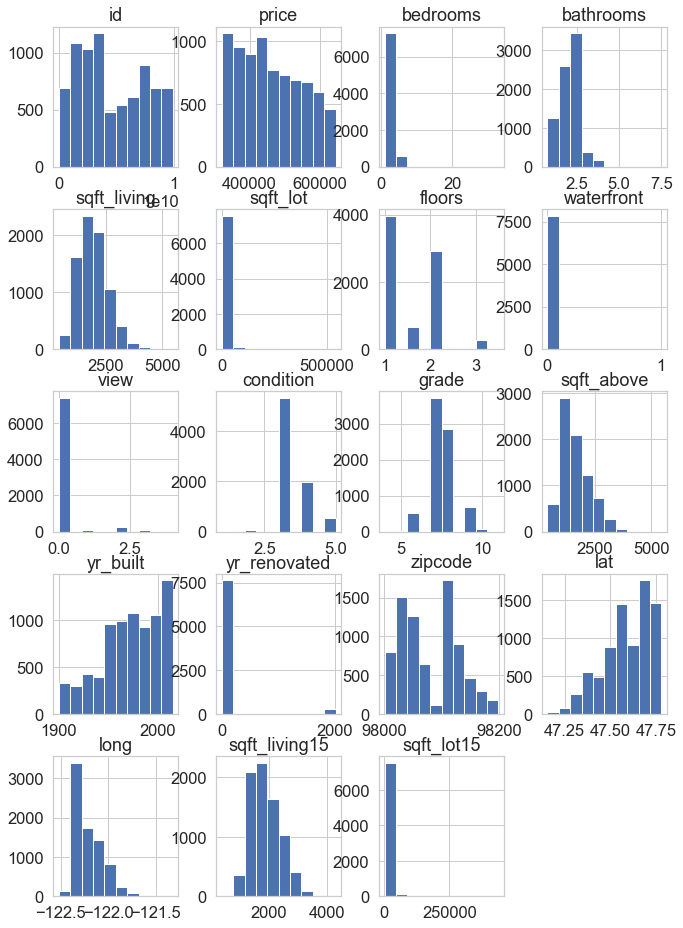

In [675]:
df.hist(figsize = (11,16))

In [676]:
conts= []
cats= []
for col in df.columns:
    if (df[col].nunique() < 25):
        cats.append(col)
    else: 
        conts.append(col)

In [677]:
df_conts = df.loc[:,conts]

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'yr_built'}>],
       [<AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>]], dtype=object)

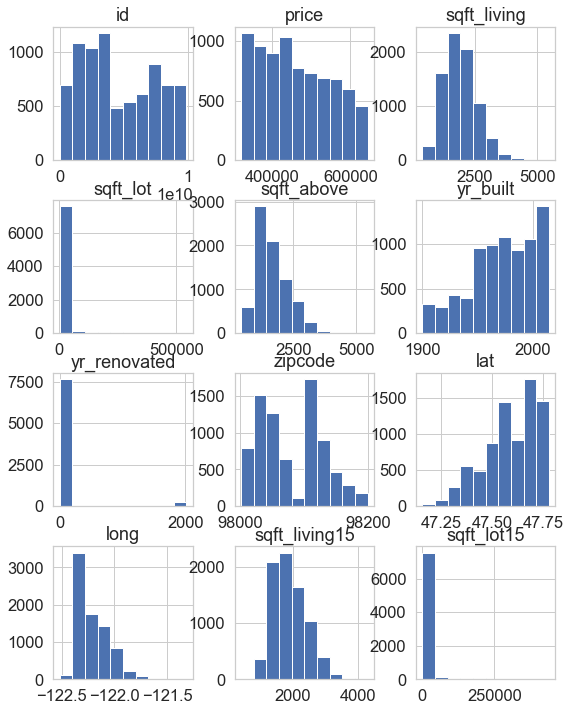

In [678]:
df_conts.hist(figsize = (9,12))

In [714]:
df['reno'] = df['yr_renovated'].map(lambda x: 0 if x == 0 else 1)

[Text(0, 0, '1900'),
 Text(1, 0, '1901'),
 Text(2, 0, '1902'),
 Text(3, 0, '1903'),
 Text(4, 0, '1904'),
 Text(5, 0, '1905'),
 Text(6, 0, '1906'),
 Text(7, 0, '1907'),
 Text(8, 0, '1908'),
 Text(9, 0, '1909'),
 Text(10, 0, '1910'),
 Text(11, 0, '1911'),
 Text(12, 0, '1912'),
 Text(13, 0, '1913'),
 Text(14, 0, '1914'),
 Text(15, 0, '1915'),
 Text(16, 0, '1916'),
 Text(17, 0, '1917'),
 Text(18, 0, '1918'),
 Text(19, 0, '1919'),
 Text(20, 0, '1920'),
 Text(21, 0, '1921'),
 Text(22, 0, '1922'),
 Text(23, 0, '1923'),
 Text(24, 0, '1924'),
 Text(25, 0, '1925'),
 Text(26, 0, '1926'),
 Text(27, 0, '1927'),
 Text(28, 0, '1928'),
 Text(29, 0, '1929'),
 Text(30, 0, '1930'),
 Text(31, 0, '1931'),
 Text(32, 0, '1932'),
 Text(33, 0, '1933'),
 Text(34, 0, '1934'),
 Text(35, 0, '1935'),
 Text(36, 0, '1936'),
 Text(37, 0, '1937'),
 Text(38, 0, '1938'),
 Text(39, 0, '1939'),
 Text(40, 0, '1940'),
 Text(41, 0, '1941'),
 Text(42, 0, '1942'),
 Text(43, 0, '1943'),
 Text(44, 0, '1944'),
 Text(45, 0, '1945')

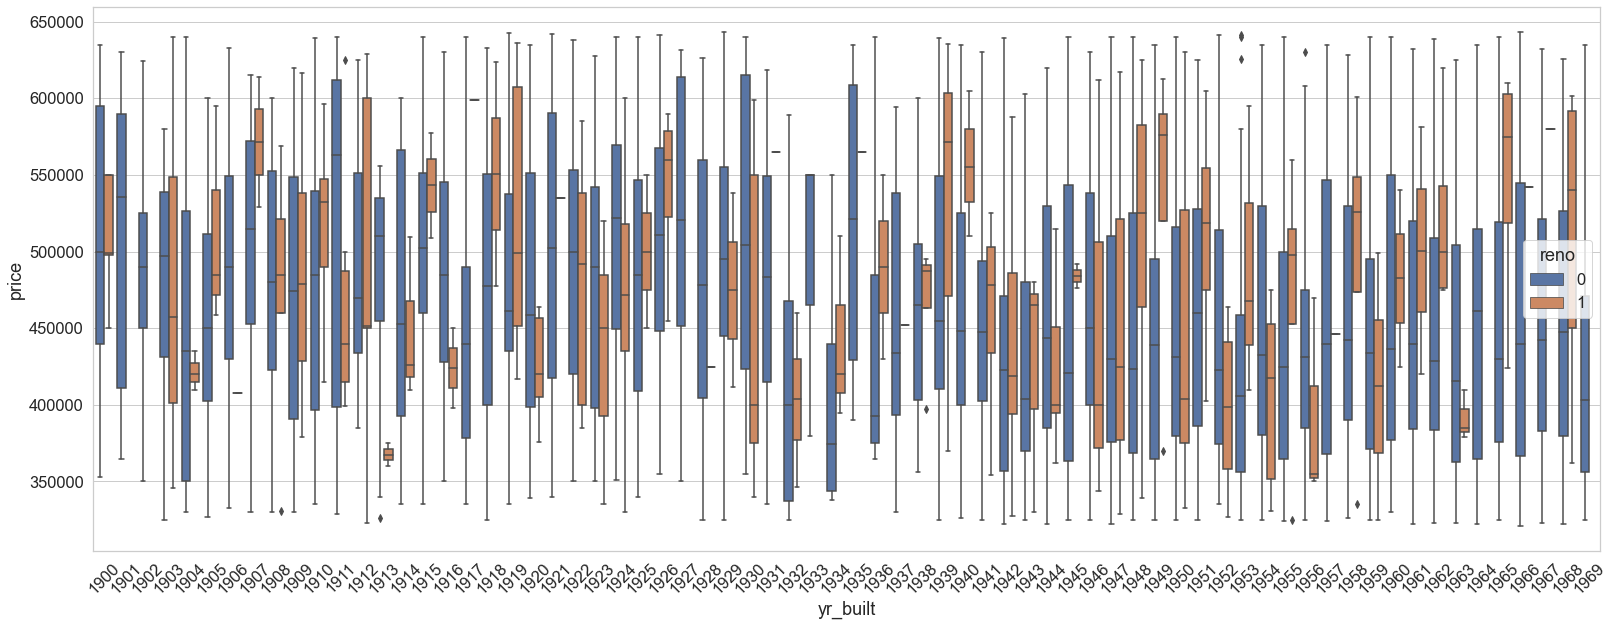

In [737]:
price = df[df['yr_built'] < 1970]

plt.figure(figsize=(27,10))
g = sns.boxplot(x = 'yr_built', y = 'price', hue = 'reno', data = price)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

In [726]:
df_cats = df.loc[:,cats]

array([[<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'floors'}>],
       [<AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>],
       [<AxesSubplot:title={'center':'grade'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

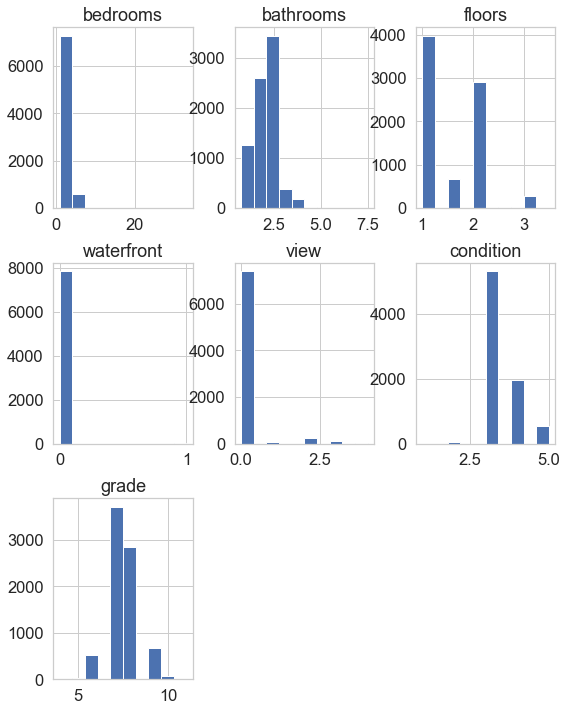

In [682]:
df_cats.hist(figsize = (9,12))

In [740]:
df['waterfront'].unique()

array([0., 1.])

In [683]:
df = df[df['bedrooms'] < 8]

<AxesSubplot:>

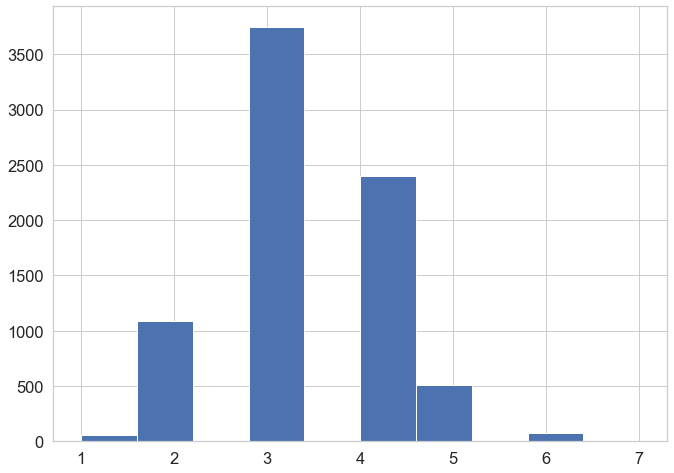

In [684]:
df.bedrooms.hist()

In [685]:
df = df[df['bathrooms'] < 4]

<AxesSubplot:>

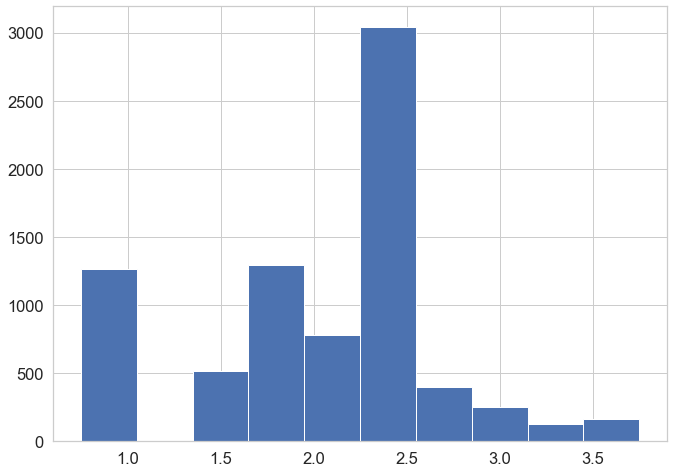

In [686]:
df.bathrooms.hist()

In [687]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.058112,0.010628,0.038545,0.030126,-0.166882,0.038338,-0.018442,0.021147,-0.045097,0.055301,0.039360,0.029267,-0.004720,0.018298,0.009516,0.025844,0.030371,-0.163333
price,0.058112,1.000000,0.108241,0.169260,0.257014,0.048020,0.077177,0.014593,0.078852,0.047647,0.288817,0.183707,-0.045571,0.033101,-0.043901,0.231965,0.043305,0.234399,0.050025
bedrooms,0.010628,0.108241,1.000000,0.445743,0.606370,0.028025,0.074309,-0.052110,0.004165,0.021178,0.217318,0.444592,0.154142,-0.013579,-0.193063,-0.179126,0.180089,0.365453,0.021548
bathrooms,0.038545,0.169260,0.445743,1.000000,0.624841,0.035100,0.473256,-0.048402,0.005161,-0.171688,0.521818,0.550730,0.611010,-0.018288,-0.249084,-0.241547,0.289834,0.438258,0.035889
sqft_living,0.030126,0.257014,0.606370,0.624841,1.000000,0.148694,0.216869,-0.028841,0.083469,-0.069970,0.539085,0.801123,0.360482,-0.008082,-0.290225,-0.360576,0.325784,0.673220,0.158889
sqft_lot,-0.166882,0.048020,0.028025,0.035100,0.148694,1.000000,-0.066433,0.022277,0.111691,0.013599,0.034571,0.142226,0.042798,0.009509,-0.177892,-0.198067,0.256944,0.173985,0.794412
floors,0.038338,0.077177,0.074309,0.473256,0.216869,-0.066433,1.000000,-0.023236,-0.055788,-0.307693,0.426148,0.470804,0.550218,-0.027174,-0.068535,-0.153198,0.106590,0.151962,-0.059067
waterfront,-0.018442,0.014593,-0.052110,-0.048402,-0.028841,0.022277,-0.023236,1.000000,0.302240,0.038819,-0.035872,-0.026052,-0.045132,0.067390,0.023120,-0.067384,-0.067714,-0.015649,0.036499
view,0.021147,0.078852,0.004165,0.005161,0.083469,0.111691,-0.055788,0.302240,1.000000,0.036274,0.046971,0.007694,-0.067131,0.012042,0.098388,-0.155704,-0.073117,0.114636,0.104741
condition,-0.045097,0.047647,0.021178,-0.171688,-0.069970,0.013599,-0.307693,0.038819,0.036274,1.000000,-0.226235,-0.191563,-0.377920,-0.046942,0.037780,0.023302,-0.120367,-0.136450,0.014308


<AxesSubplot:>

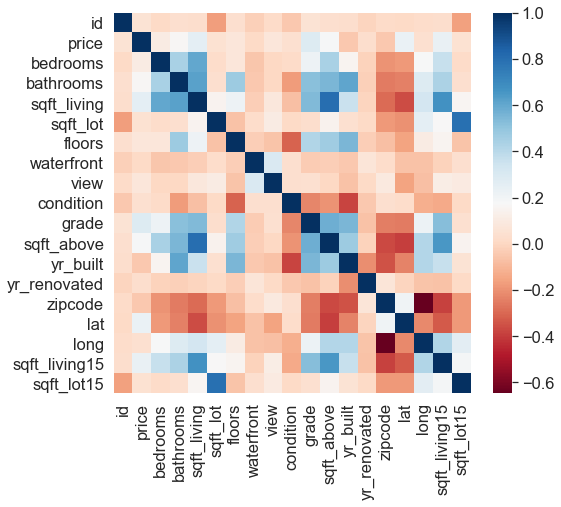

In [688]:
#Looking at the correlation between different columns to check for multicollinearity.

plt.figure(figsize = (8,7))
sns.heatmap(df.corr(), cmap = 'RdBu')

In [689]:
#variance inflation factor
X1 = sm.tools.add_constant(df)
#create a series for both
series_before = pd.Series([variance_inflation_factor(X1.values, i ) for i in range(X1.shape[1])], index = X1.columns)

print('DATA BEFORE')
print('-'*100)
display(series_before)
#dropping columns i think will cause problems
df_1_after = df.drop(['id', 'sqft_living15', 'sqft_lot15', 'sqft_lot', 'sqft_above', 'waterfront'], axis = 1)
X2 = sm.tools.add_constant(df_1_after)
series_after = pd.Series([variance_inflation_factor(X2.values, i ) for i in range(X2.shape[1])], index = X2.columns)

print('DATA AFTER')
print('-'*100)
display(series_after)

DATA BEFORE
----------------------------------------------------------------------------------------------------


/Users/andrewozbun/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


const            0.000000
id               1.049902
price            1.475457
bedrooms         1.732389
bathrooms        2.697777
sqft_living      5.305947
sqft_lot         2.782842
floors           2.219063
waterfront       1.124089
view             1.212254
condition        1.262879
grade            2.202693
sqft_above       4.762064
yr_built         2.966071
yr_renovated     1.107168
zipcode          1.863735
lat              1.510053
long             2.123478
sqft_living15    2.364154
sqft_lot15       2.781139
dtype: float64

DATA AFTER
----------------------------------------------------------------------------------------------------


const           5.001688e+06
price           1.445371e+00
bedrooms        1.718613e+00
bathrooms       2.588366e+00
sqft_living     2.842533e+00
floors          1.671556e+00
view            1.079122e+00
condition       1.247228e+00
grade           2.081745e+00
yr_built        2.956783e+00
yr_renovated    1.097445e+00
zipcode         1.820147e+00
lat             1.445949e+00
long            1.940772e+00
dtype: float64

In [690]:
X = df_1_after.drop('price', axis = 1)
y = df_1_after[['price']]

#Split dataset into training and testing portion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

#create instance of our model
regression_model = LinearRegression()
#fit the model
regression_model.fit(X_train, y_train)

LinearRegression()

In [691]:
len(X_test)

1568

In [692]:
y_hat_train = regression_model.predict(X_train)
y_hat_test = regression_model.predict(X_test)

In [693]:
mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat_test)

In [694]:
print('Train MSE:', mse_train)
print('Test MSE:', mse_test)

Train MSE: 5466482228.396738
Test MSE: 5954062634.987725


In [695]:
print('RMSE Train:', np.sqrt(mse_train))
print('RMSE Test:', np.sqrt(mse_test))

RMSE Train: 73935.66276430298
RMSE Test: 77162.57276029438


In [696]:
r2_score(y_test, y_hat_test)

0.2796456988875581

In [697]:
#Exploring the intercept and coefficient

intercept = regression_model.intercept_[0]
coef = regression_model.coef_[0][0]

print('The intercept for our model is {:.4}'.format(intercept))
print('-'*100)

#Loop through the dictionary and print the coeffcient data
#so, for instance, for each unit in sqft_above, there is a 9.4% rise in price.
for coef in zip(X.columns, regression_model.coef_[0]):
    print('The Coefficient for {} is {:.2}'.format(coef[0], coef[1]))

The intercept for our model is 2.565e+06
----------------------------------------------------------------------------------------------------
The Coefficient for bedrooms is -8.1e+03
The Coefficient for bathrooms is 1.4e+04
The Coefficient for sqft_living is 3.7e+01
The Coefficient for floors is 1.7e+04
The Coefficient for view is 1.4e+04
The Coefficient for condition is 8.7e+03
The Coefficient for grade is 3.9e+04
The Coefficient for yr_built is -1.1e+03
The Coefficient for yr_renovated is 0.56
The Coefficient for zipcode is -7.2e+01
The Coefficient for lat is 2.7e+05
The Coefficient for long is 5.1e+04


In [698]:
X_1 = sm.add_constant(X)
model = sm.OLS(y, X_1)
est = model.fit()

In [699]:
#Homoscedasticity checks
_, pval, _, f_pval = diag.het_breuschpagan(est.resid, est.model.exog)
print(pval, f_pval)

7.665918196958392e-14 6.364647525984039e-14


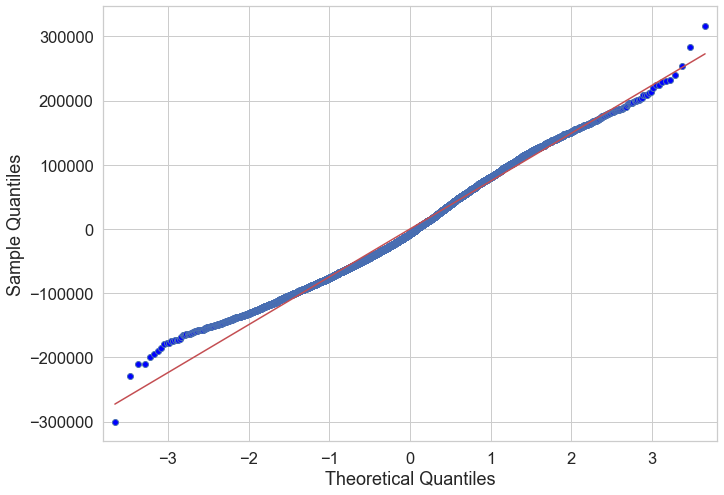

Mean: 1.0650528936969991e-07


In [700]:
#check for the normality of the residuals
sm.qqplot(est.resid, line = 's')
pylab.show()

#check that the mean of the residuals is approx. 0
mean_residuals = sum(est.resid) / len(est.resid)
print("Mean:", mean_residuals)

In [701]:
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     290.5
Date:                Fri, 15 Jan 2021   Prob (F-statistic):               0.00
Time:                        13:23:24   Log-Likelihood:                -99087.
No. Observations:                7840   AIC:                         1.982e+05
Df Residuals:                    7827   BIC:                         1.983e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.331e+06   1.89e+06      0.706   